In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import StandardScaler
from math import sqrt
%matplotlib inline

# DATA CLEANING AND PREPROCESSING

In [2]:
missing_values = ["na","Varies with device"," ","Unrated"]
data=pd.read_csv('newg.csv',na_values=missing_values)

In [3]:
data.isnull().sum()

App                 0
Category           16
Rating           1474
Reviews            29
Size             1695
Installs            0
Type                0
Price               0
ContentRating      13
Genres              0
Last Updated        0
Current Ver      1460
Android Ver      1363
dtype: int64

In [4]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,5000000,Free,0,Teen,Art & Design,08-Jun-18,NaN,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,06-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0,Mature 17,Books & Reference,19-Jan-15,NaN,NaN


In [5]:
data.describe()

,Rating,Installs
count,9367.000000,1.084100e+04
mean,4.193338,1.545876e+07
std,0.537431,8.502498e+07
min,1.000000,0.000000e+00
25%,4.000000,1.000000e+03
50%,4.300000,1.000000e+05
75%,4.500000,5.000000e+06
max,19.000000,1.000000e+09


In [6]:
data.shape

(10841, 13)

In [7]:
data.isnull().sum()

App                 0
Category           16
Rating           1474
Reviews            29
Size             1695
Installs            0
Type                0
Price               0
ContentRating      13
Genres              0
Last Updated        0
Current Ver      1460
Android Ver      1363
dtype: int64

In [8]:
data['Category'].value_counts(dropna=False)

FAMILY                 1971
GAME                   1144
TOOLS                   839
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            423
PERSONALIZATION         390
COMMUNICATION           387
SPORTS                  382
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             334
SOCIAL                  295
NEWS_AND_MAGAZINES      281
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           173
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  81
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
NaN                      16
1.9                       1
Name: Category, dtyp

In [9]:
count1=0
count2=20
for i in range((len(data['Category'])//20)+1):
    list_mode= data.Category[count1:count2].mode()[0]
    data.Category[count1:count2]= data.Category[count1:count2].fillna(list_mode)
    count1+=20
    count2+=20

C:\Users\nisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [10]:
data['Category'].value_counts(dropna=False)

FAMILY                 1973
GAME                   1144
TOOLS                   842
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      282
SHOPPING                260
TRAVEL_AND_LOCAL        259
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [11]:
data['ContentRating'].value_counts(dropna=False)

Everyone          8707
Teen              1208
Mature 17          496
Everyone 10        414
NaN                 13
Adults only 18       3
Name: ContentRating, dtype: int64

In [12]:
for i in range((len(data['ContentRating']))):
    if(data['ContentRating'].isnull()[i]==True):
               if(data['Category'][i]=='DATING'):
                    data['ContentRating'][i]='Mature 17'
               else:
                    data['ContentRating'][i]='Everyone'

C:\Users\nisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
data['ContentRating'].value_counts(dropna=False)

Everyone          8719
Teen              1208
Mature 17          497
Everyone 10        414
Adults only 18       3
Name: ContentRating, dtype: int64

In [14]:
data.isnull().sum()

App                 0
Category            0
Rating           1474
Reviews            29
Size             1695
Installs            0
Type                0
Price               0
ContentRating       0
Genres              0
Last Updated        0
Current Ver      1460
Android Ver      1363
dtype: int64

In [15]:
data.Size=data.Size.fillna('0M')
for i in range(len(data.Size)):
    if(i == 10472) :
        continue
    if(data.Size[i][-1]=='K'):
        data.Size[i]=float(data.Size[i][:-1]/1000)
    else:
        data.Size[i]=float(data.Size[i][:-1])
category=list(set(data.Category))
count=0;
mean=0;
cat={}
for c in category:
    if(c=='1.9' or i ==10472):
        continue
    count=0;
    mean=0;
    for i in range(len(data.Size)):
        if(data.Category[i]==c):
            if(i == 10472) :
                continue
            mean=mean+float(data.Size[i])
            count+=1
    cat[c]=round(mean/count,2)
for i in range(len(data.Size)):
    if(data.Size[i]=='0'):
        data.Size[i]=cat[data.Category[i]]

C:\Users\nisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
data.Size.describe()

count     10841.0
unique      421.0
top           0.0
freq       1746.0
Name: Size, dtype: float64

In [17]:
data[data.Category == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000",1000,0,Everyone,Everyone,11-Feb-18,1.0.19,4.0 and up,NaN


In [18]:
data.drop([10472],inplace=True)

In [19]:
data.Size = np.float64(data.Size)

In [20]:
data.Size.describe()

count    10840.000000
mean        31.234972
std         91.808356
min          0.000000
25%          3.100000
50%         10.000000
75%         28.000000
max       1020.000000
Name: Size, dtype: float64

In [21]:
data=data.drop('Current Ver',axis=1)

In [22]:
data['Android Ver']=data['Android Ver'].fillna('0.0')
for i in range(len(data['Android Ver'])):
    if (i == 10472) :
        continue    
    data['Android Ver'][i]=float(data['Android Ver'][i][0:1])
androidmedian=data['Android Ver'].median()
for i in range(len(data['Android Ver'])):
    if (i == 10472) :
        continue  
    if(data['Android Ver'][i]==0):
        data['Android Ver'][i]=androidmedian
        

C:\Users\nisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\nisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [23]:
data.isnull().sum()

App                 0
Category            0
Rating           1474
Reviews            29
Size                0
Installs            0
Type                0
Price               0
ContentRating       0
Genres              0
Last Updated        0
Android Ver         0
dtype: int64

In [24]:
rating_median=data.Rating.median()
data.Rating=data.Rating.fillna(rating_median)

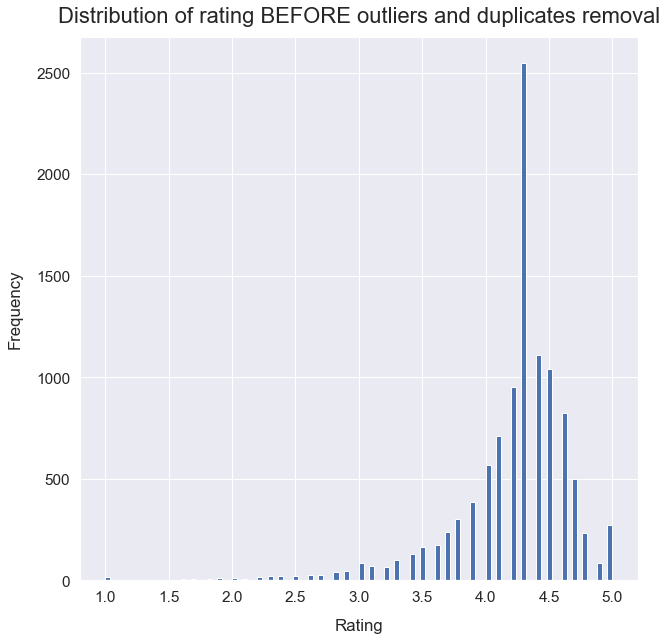

In [25]:
sns.set(font_scale=1.4)
data['Rating'].plot(kind='hist',figsize=(10,10),bins=100);
plt.xlabel("Rating",labelpad=14)
plt.ylabel("Frequency",labelpad=14)
plt.title('Distribution of rating BEFORE outliers and duplicates removal',y=1.015,fontsize=22);

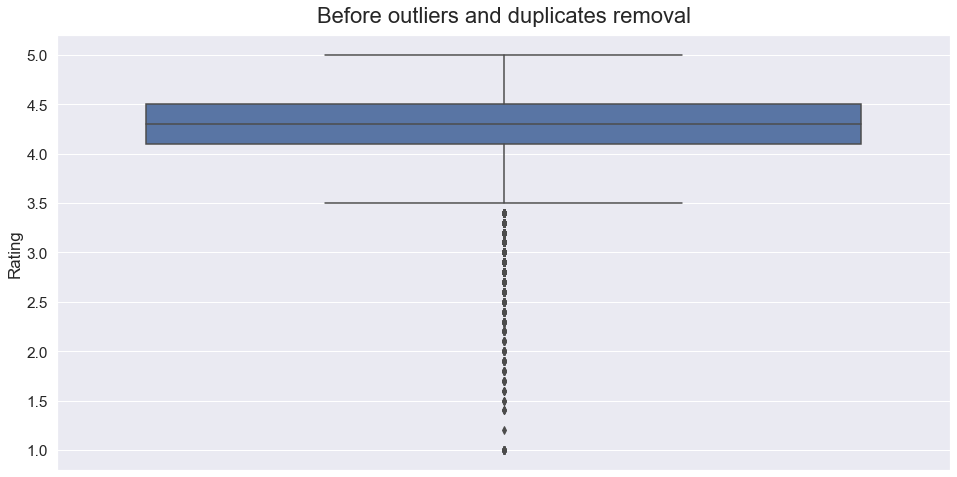

In [26]:
fig = plt.subplots(figsize = (16,8))
plt.xticks(rotation=90)
plt.title( 'Before outliers and duplicates removal',y=1.015,fontsize=22);
sns.boxplot( y=data.Rating)

In [27]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews          29
Size              0
Installs          0
Type              0
Price             0
ContentRating     0
Genres            0
Last Updated      0
Android Ver       0
dtype: int64

In [28]:
data.Reviews=data.Reviews.fillna(0)

In [29]:
data['Price'] = data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
data['Price'] = data['Price'].apply(lambda x: float(x))
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
data['Installs'] = data['Installs'].apply(lambda x: float(x))

In [30]:
data.Type.unique()

array(['Free', 'Paid', '2'], dtype=object)

In [31]:
data[data.Type == '2']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,Last Updated,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,0.0,0.0,2,0.0,Everyone 10,Strategy,28-Jun-18,4


In [32]:
data.drop([9148],inplace=True)

In [33]:
data = data[data.Installs > 4999]

In [34]:
data.drop_duplicates(subset = "App" ,keep=False, inplace = True)

In [35]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,07-Jan-18,4
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,01-Aug-18,4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,5000000.0,Free,0.0,Teen,Art & Design,08-Jun-18,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,26-Mar-17,2
...,...,...,...,...,...,...,...,...,...,...,...,...
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3,100000.0,Free,0.0,Everyone,News & Magazines,20-Jan-14,1
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,4.3,38,9.8,5000.0,Free,0.0,Everyone,Maps & Navigation,13-Jun-18,4
10832,FR Tides,WEATHER,3.8,1195,582.0,100000.0,Free,0.0,Everyone,Weather,16-Feb-14,2
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,25-Jul-17,4


In [36]:
data.shape

(6210, 12)

In [37]:
data.describe()

,Rating,Reviews,Size,Installs,Price
count,6210.000000,6.210000e+03,6210.000000,6.210000e+03,6210.000000
mean,4.153704,1.417512e+05,32.974767,5.011537e+06,0.813335
std,0.464098,8.747673e+05,90.972166,2.582872e+07,15.676559
min,1.400000,0.000000e+00,0.000000,5.000000e+03,0.000000
25%,4.000000,4.012500e+02,3.600000,5.000000e+04,0.000000
50%,4.300000,4.572000e+03,12.000000,5.000000e+05,0.000000
75%,4.500000,4.262325e+04,32.000000,1.000000e+06,0.000000
max,5.000000,4.291653e+07,986.000000,1.000000e+09,400.000000


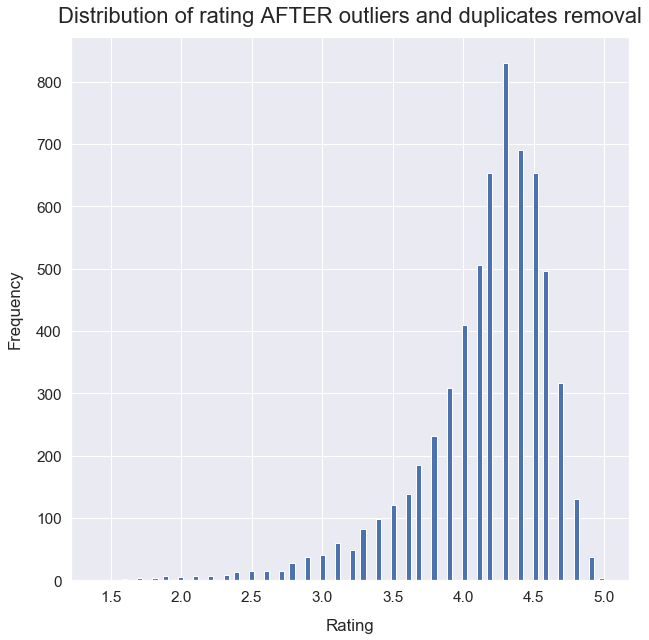

In [38]:
sns.set(font_scale=1.4)
data['Rating'].plot(kind='hist',figsize=(10,10),bins=100);
plt.xlabel("Rating",labelpad=14)
plt.ylabel("Frequency",labelpad=14)
plt.title('Distribution of rating AFTER outliers and duplicates removal',y=1.015,fontsize=22);

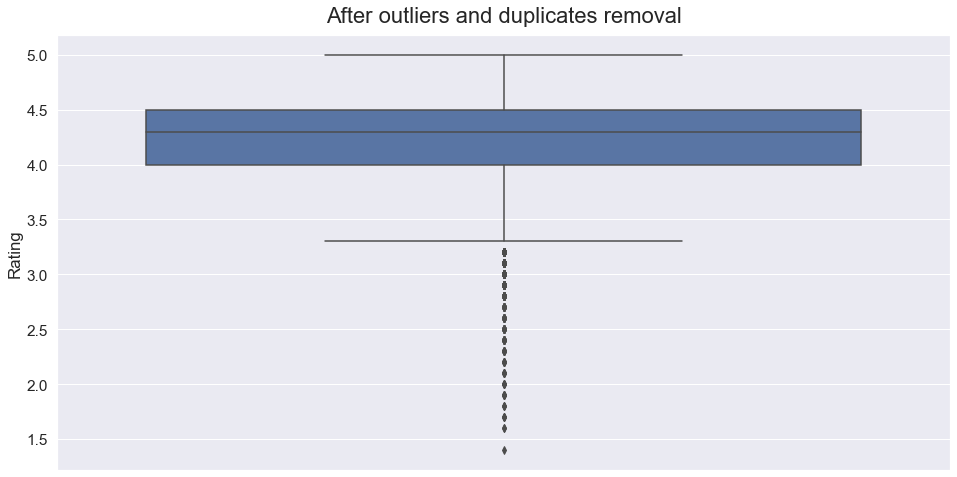

In [39]:
fig = plt.subplots(figsize = (16,8))
plt.xticks(rotation=90)
plt.title( 'After outliers and duplicates removal',y=1.015,fontsize=22);
sns.boxplot( y=data.Rating)

# DATA VISUALIZATION

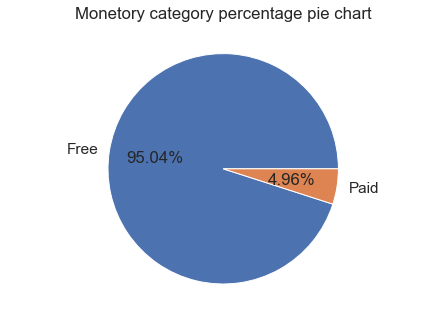

In [40]:
#pie chart
count = 0
category = {}
for i in data['Type']:
    if i not in category.keys():
        category[i] = 0
    category[i] += 1
x_category = list(category.keys())
values = list(category.values())
#plt.tick_params(axis='y', which='major', labelsize=7)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(values, labels = x_category,autopct='%1.2f%%')

plt.title('Monetory category percentage pie chart')
plt.show()

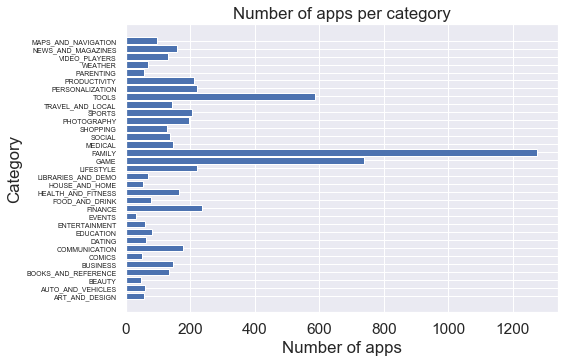

In [41]:
#bar graph
count = 0
category = {}
for i in data['Category']:
    if i not in category.keys():
        category[i] = 0
    category[i] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_category = list(category.keys())
values = list(category.values())
ax.barh(x_category, values)

plt.tick_params(axis='y', which='major', labelsize=7)
plt.xlabel("Number of apps") 
plt.ylabel("Category") 
plt.title('Number of apps per category')

plt.show()

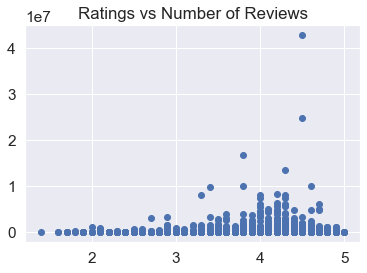

In [42]:
#scatter plot
rating = list(data['Rating'])
reviews = sorted(list(map(int,list(data['Reviews']))))
plt.scatter(rating,reviews)
plt.title("Ratings vs Number of Reviews")
plt.show()


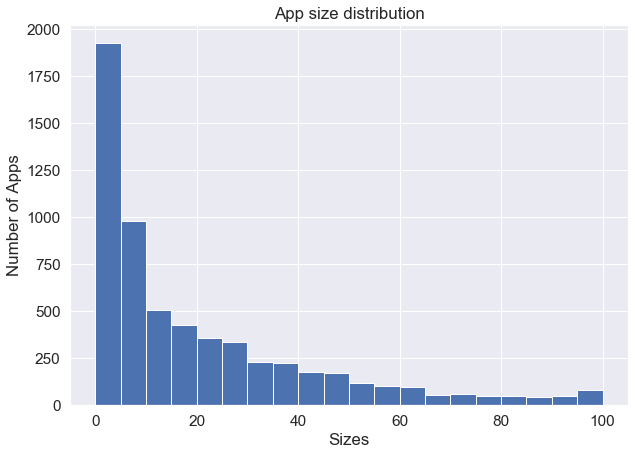

In [43]:
#histogram(average rating vs number of apps per category)
sizes = []
for size in data['Size']:
    sizes.append(float(size))
#print(sizes)

    
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(sizes, bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]) 

plt.xlabel("Sizes") 
plt.ylabel("Number of Apps") 

plt.title('App size distribution')
# Show plot 
plt.show()

In [44]:
cat = data.groupby('Category')
ratingsMean = cat['Rating'].agg(np.mean)
reviewMean = cat['Reviews'].agg(np.mean)
priceSum = cat['Price'].agg(np.sum)
priceMean = cat['Price'].agg(np.mean)
totalInstalls = cat['Installs'].agg(np.sum)
meanInstalls = cat['Installs'].agg(np.mean)
meanSize = cat['Size'].agg(np.mean)

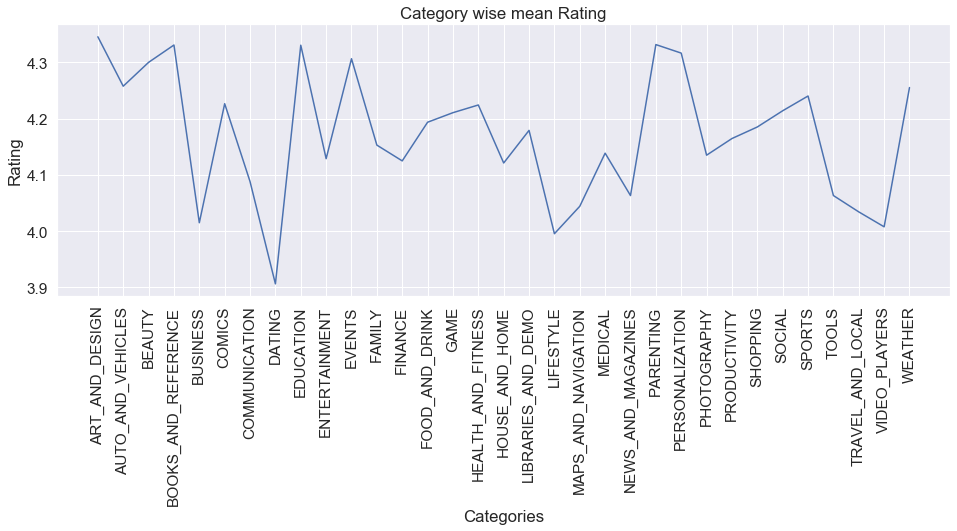

In [45]:
plt.figure(figsize=(16,5))
plt.plot(ratingsMean)
plt.xticks(rotation=90)
plt.title('Category wise mean Rating')
plt.xlabel('Categories')
plt.ylabel('Rating')
plt.show()

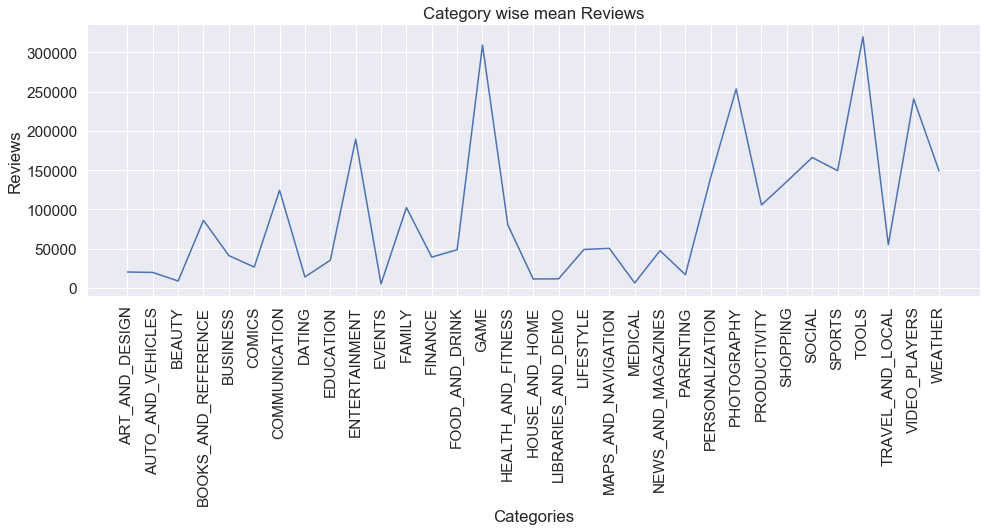

In [46]:
plt.figure(figsize=(16,5))
plt.plot(reviewMean)
plt.xticks(rotation=90)
plt.title('Category wise mean Reviews')
plt.xlabel('Categories')
plt.ylabel('Reviews')
plt.show()

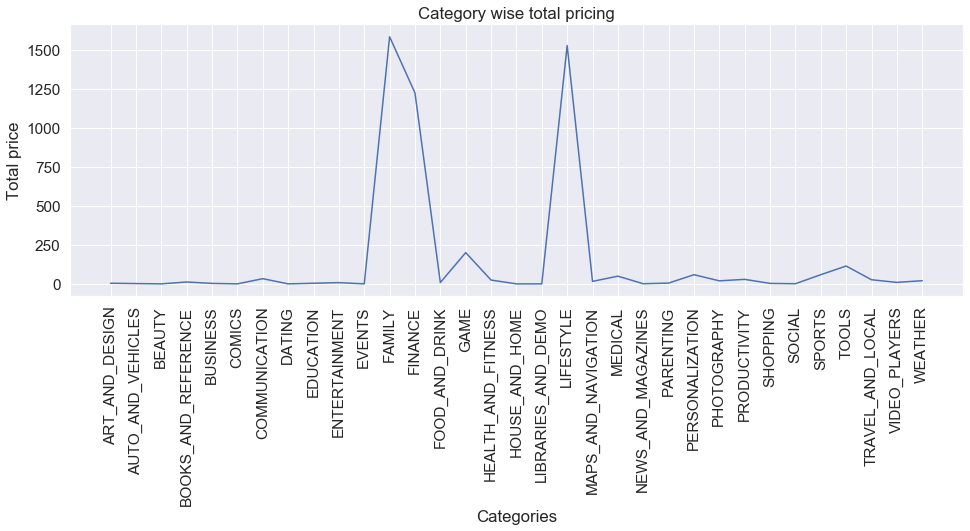

In [47]:
plt.figure(figsize=(16,5))
plt.plot(priceSum)
plt.xticks(rotation=90)
plt.title('Category wise total pricing')
plt.xlabel('Categories')
plt.ylabel('Total price')
plt.show()

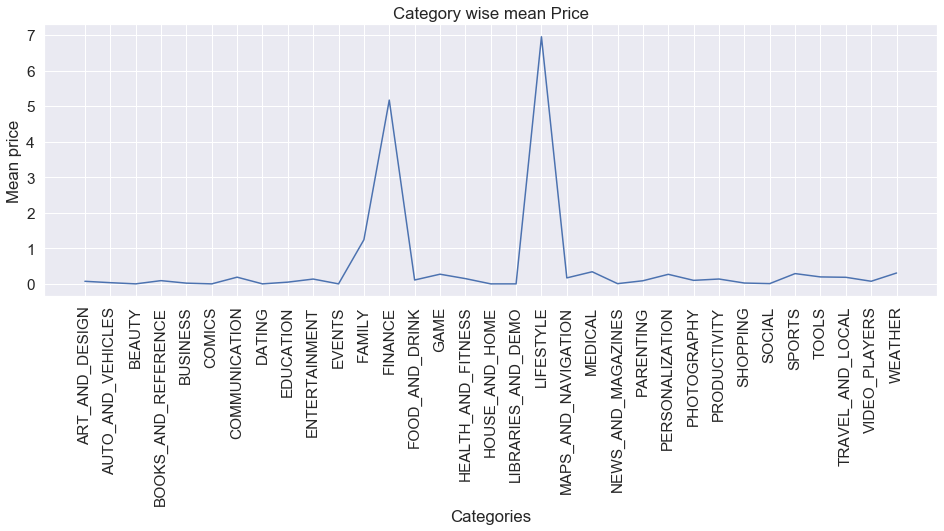

In [48]:
plt.figure(figsize=(16,5))
plt.plot(priceMean)
plt.xticks(rotation=90)
plt.title('Category wise mean Price')
plt.xlabel('Categories')
plt.ylabel('Mean price')
plt.show()

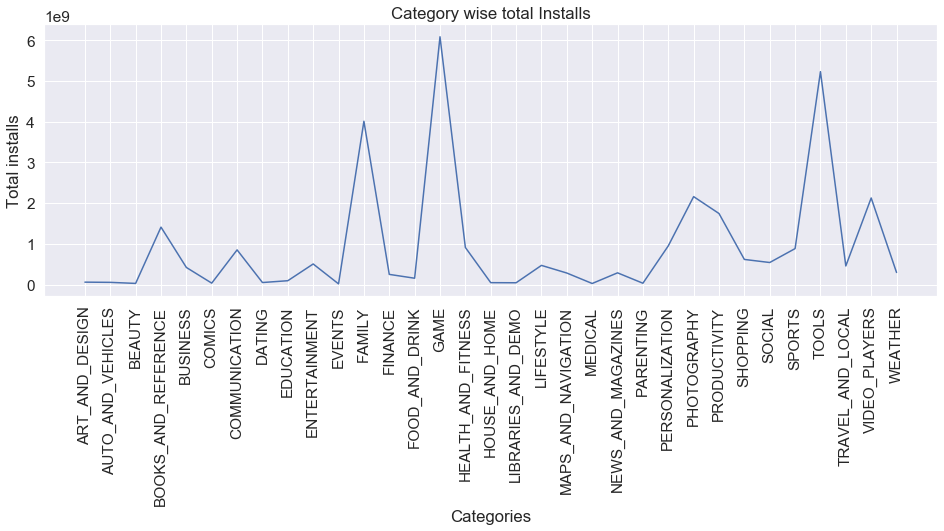

In [49]:
plt.figure(figsize=(16,5))
plt.plot(totalInstalls)
plt.xticks(rotation=90)
plt.title('Category wise total Installs')
plt.xlabel('Categories')
plt.ylabel('Total installs')
plt.show()

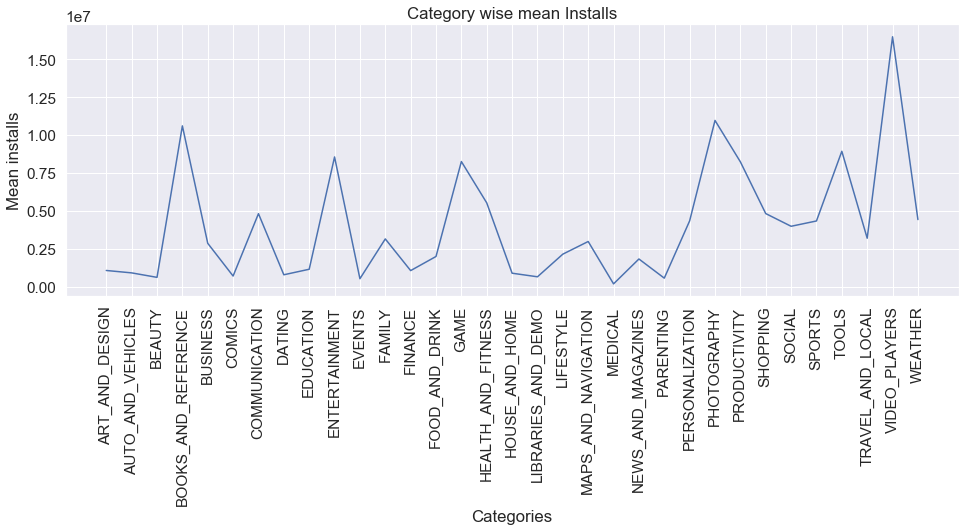

In [50]:
plt.figure(figsize=(16,5))
plt.plot(meanInstalls)
plt.xticks(rotation=90)
plt.title('Category wise mean Installs')
plt.xlabel('Categories')
plt.ylabel('Mean installs')
plt.show()

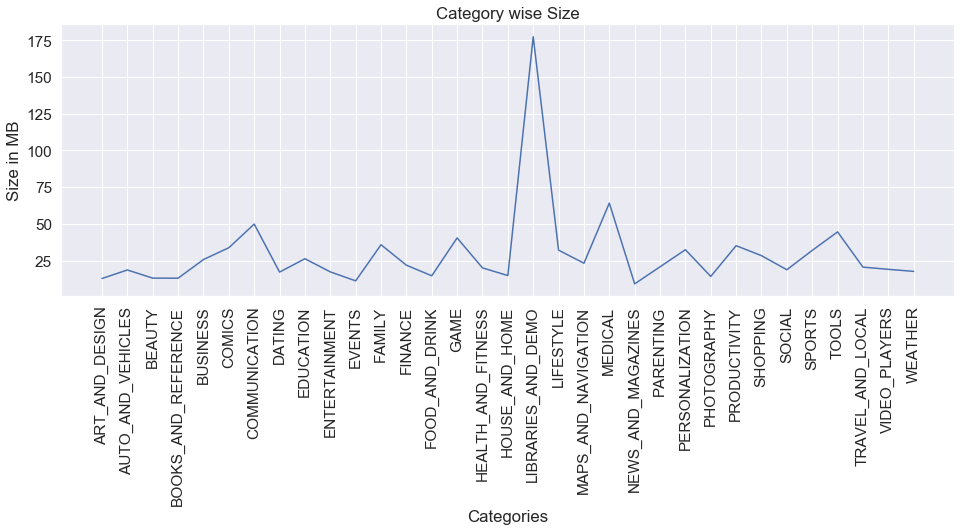

In [51]:
plt.figure(figsize=(16,5))
plt.plot(meanSize)
plt.xticks(rotation=90)
plt.title('Category wise Size')
plt.xlabel('Categories')
plt.ylabel('Size in MB')
plt.show()

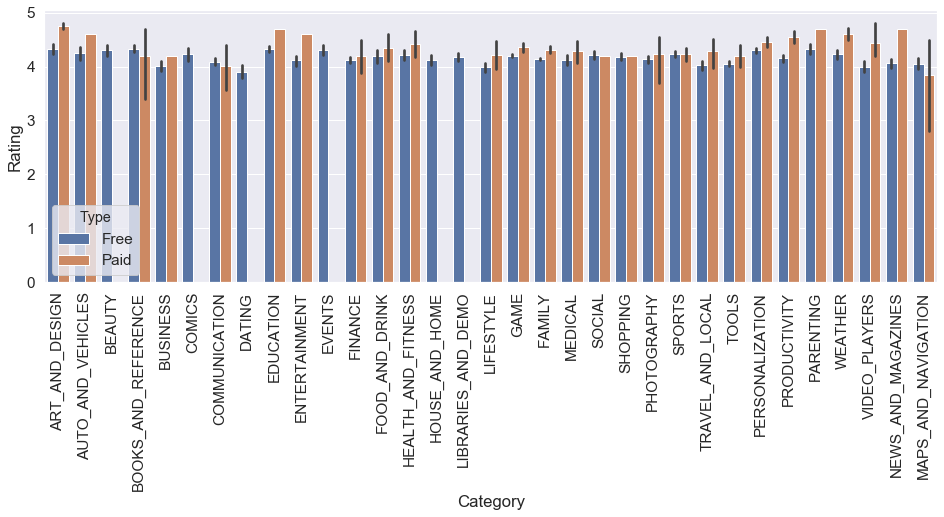

In [52]:
plt.figure(figsize=(16,5))
plt.xticks(rotation = 90)
sns.barplot(x=data.Category,y=data.Rating,data=data , hue = data.Type)


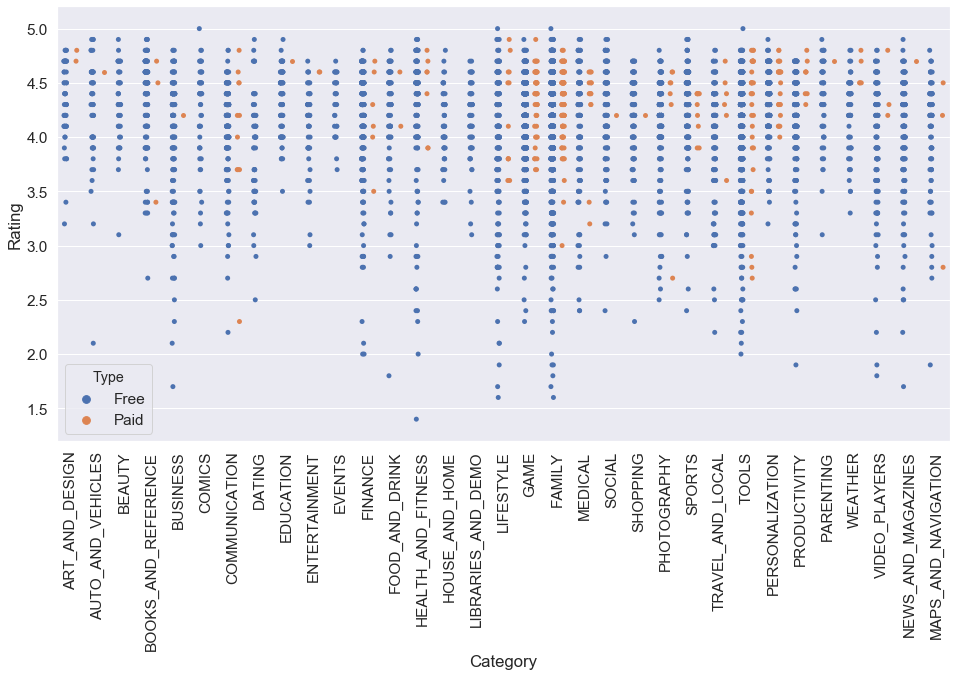

In [53]:
plt.figure(figsize=(16,8))
plt.xticks(rotation = 90)
sns.stripplot(x=data.Category,y=data.Rating, hue = data.Type, dodge = True, jitter =True)


In [54]:
cont = data.groupby('ContentRating')

In [55]:
cont.describe()

Rating                                                Reviews  \
                 count      mean       std  min   25%  50%   75%  max   count   
ContentRating                                                                   
Adults only 18     3.0  4.300000  0.435890  3.8  4.15  4.5  4.55  4.6     3.0   
Everyone        4999.0  4.147570  0.479209  1.4  4.00  4.3  4.50  5.0  4999.0   
Everyone 10      247.0  4.223077  0.352451  2.2  4.05  4.3  4.50  4.9   247.0   
Mature 17        246.0  4.098374  0.445198  2.4  3.90  4.2  4.40  4.9   246.0   
Teen             715.0  4.191049  0.386941  2.0  4.00  4.3  4.50  4.9   715.0   

                               ...   Installs                 Price            \
                         mean  ...        75%           max   count      mean   
ContentRating                  ...                                              
Adults only 18   27116.000000  ...   750000.0  1.000000e+06     3.0  0.000000   
Everyone        125067.704341  ...  1000000.0  5.000000e+08  4999.0  0.950122   
Everyone 10     207000.554656  ...  5000000.0  1.000000e+08   247.0  0.428178   
Mature 17       165196.926829  ...  1000000.0  1.000000e+08   246.0  0.101341   
Teen            228269.520280  ...  5000000.0  1.000000e+09   715.0  0.238406   

                                                       
                      std  min  25%  50%  75%     max  
ContentRating                                          
Adults only 18   0.000000  0.0  0.0  0.0  0.0    0.00  
Everyone        17.456085  0.0  0.0  0.0  0.0  400.00  
Everyone 10      1.982236  0.0  0.0  0.0  0.0   19.99  
Mature 17        0.813093  0.0  0.0  0.0  0.0    9.99  
Teen             1.350795  0.0  0.0  0.0  0.0   16.99  

[5 rows x 40 columns]

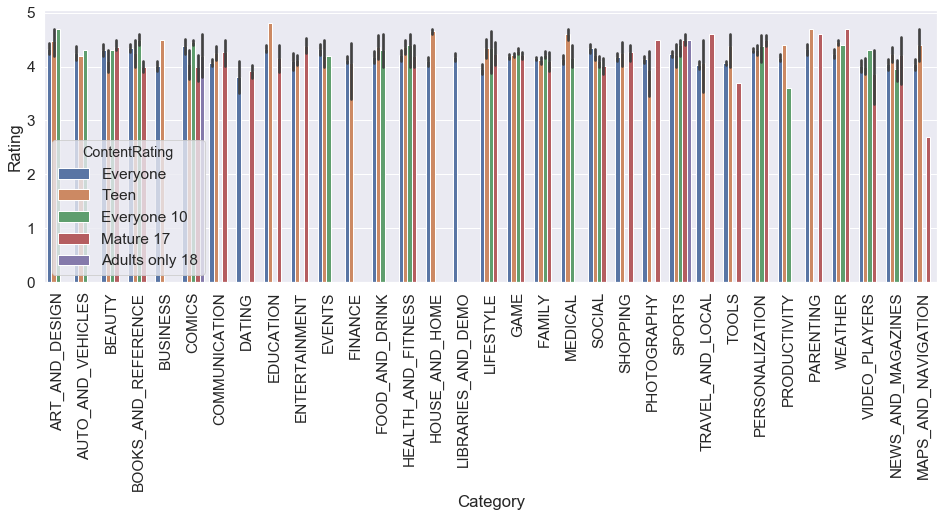

In [56]:
plt.figure(figsize=(16,5))
plt.xticks(rotation = 90)
sns.barplot(x=data.Category,y=data.Rating,data=data , hue = data.ContentRating)


In [57]:

ratingsMean = cont['Rating'].agg(np.mean)
reviewMean = cont['Reviews'].agg(np.mean)
priceSum = cont['Price'].agg(np.sum)
priceMean = cont['Price'].agg(np.mean)
totalInstalls = cont['Installs'].agg(np.sum)
meanInstalls = cont['Installs'].agg(np.mean)
meanSize = cont['Size'].agg(np.mean)

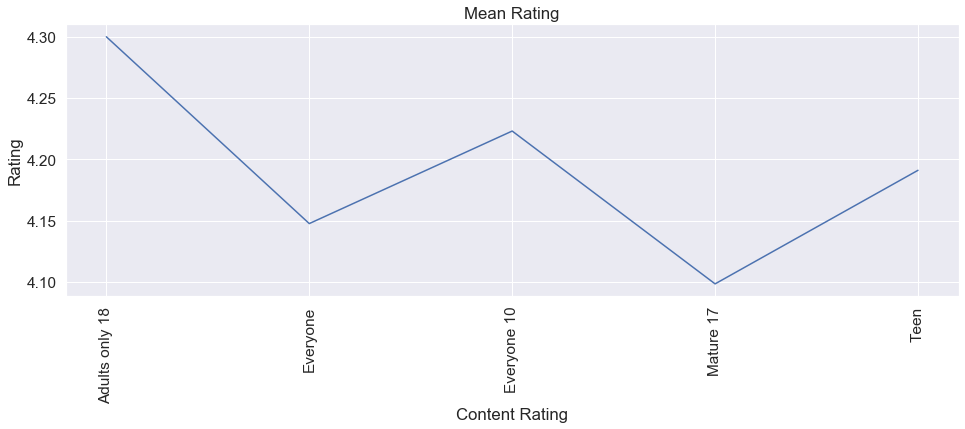

In [58]:
plt.figure(figsize=(16,5))
plt.plot(ratingsMean)
plt.xticks(rotation=90)
plt.title('Mean Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.show()

In [59]:
data['ContentRating'].value_counts(dropna=False)

Everyone          4999
Teen               715
Everyone 10        247
Mature 17          246
Adults only 18       3
Name: ContentRating, dtype: int64

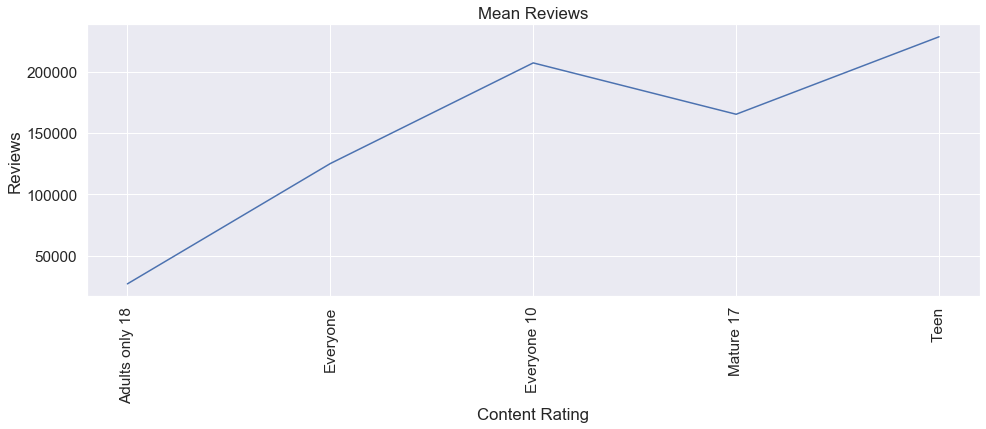

In [61]:
plt.figure(figsize=(16,5))
plt.plot(reviewMean)
plt.xticks(rotation=90)
plt.title('Mean Reviews')
plt.xlabel('Content Rating')
plt.ylabel('Reviews')
plt.show()

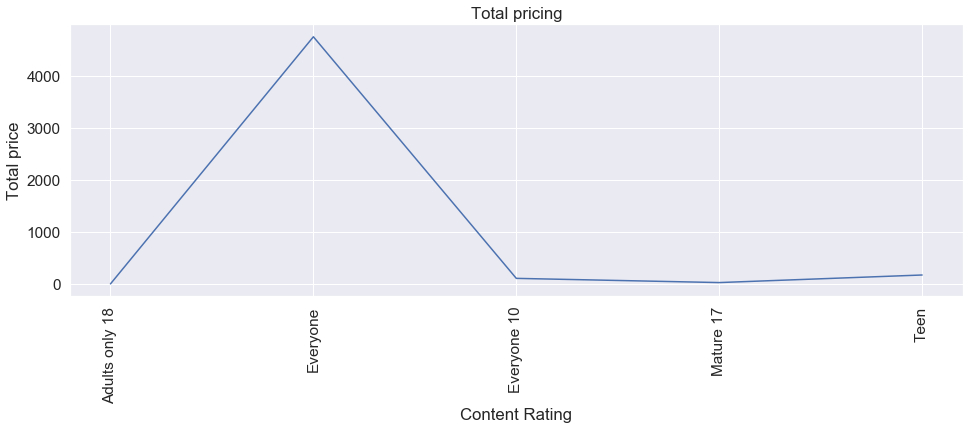

In [62]:
plt.figure(figsize=(16,5))
plt.plot(priceSum)
plt.xticks(rotation=90)
plt.title('Total pricing')
plt.xlabel('Content Rating')
plt.ylabel('Total price')
plt.show()

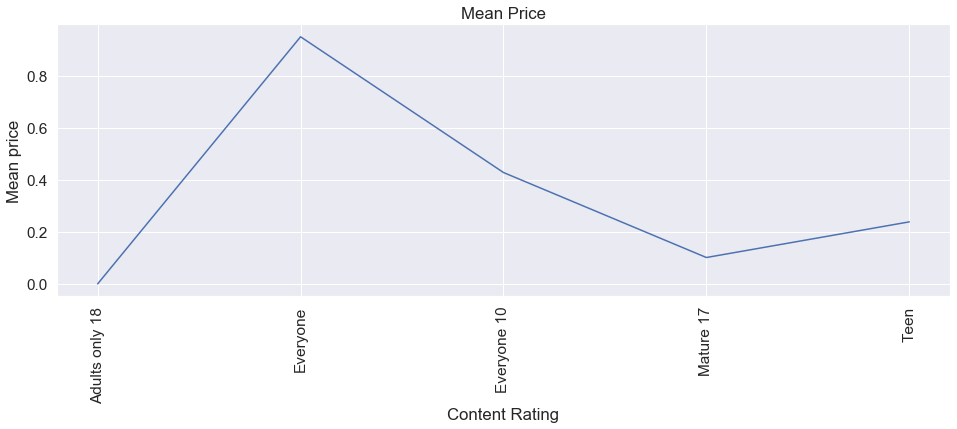

In [63]:
plt.figure(figsize=(16,5))
plt.plot(priceMean)
plt.xticks(rotation=90)
plt.title('Mean Price')
plt.xlabel('Content Rating')
plt.ylabel('Mean price')
plt.show()

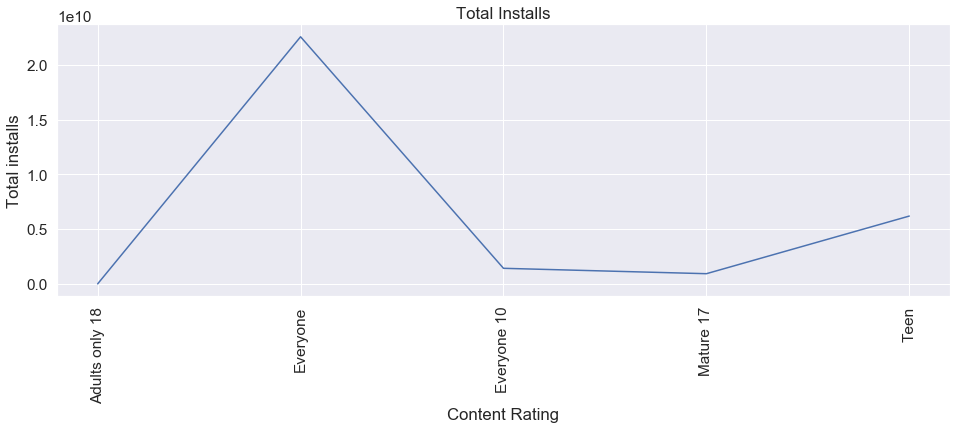

In [64]:
plt.figure(figsize=(16,5))
plt.plot(totalInstalls)
plt.xticks(rotation=90)
plt.title('Total Installs')
plt.xlabel('Content Rating')
plt.ylabel('Total installs')
plt.show()

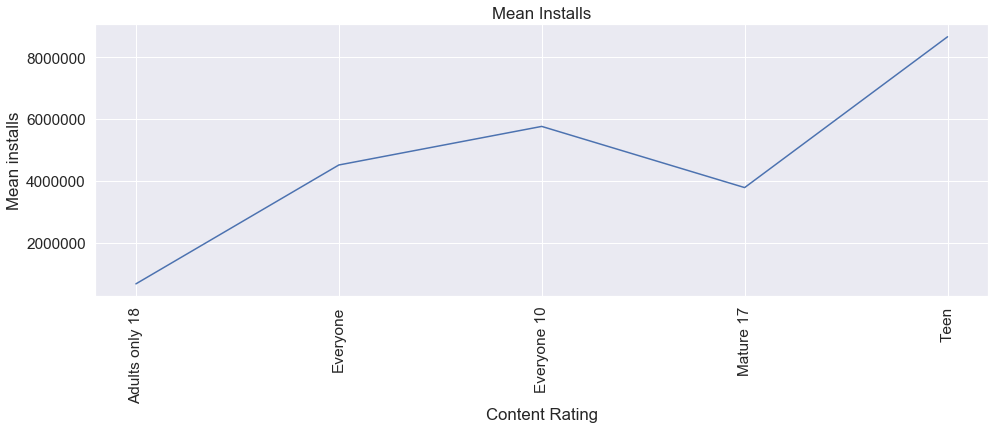

In [65]:
plt.figure(figsize=(16,5))
plt.plot(meanInstalls)
plt.xticks(rotation=90)
plt.title('Mean Installs')
plt.xlabel('Content Rating')
plt.ylabel('Mean installs')
plt.show()

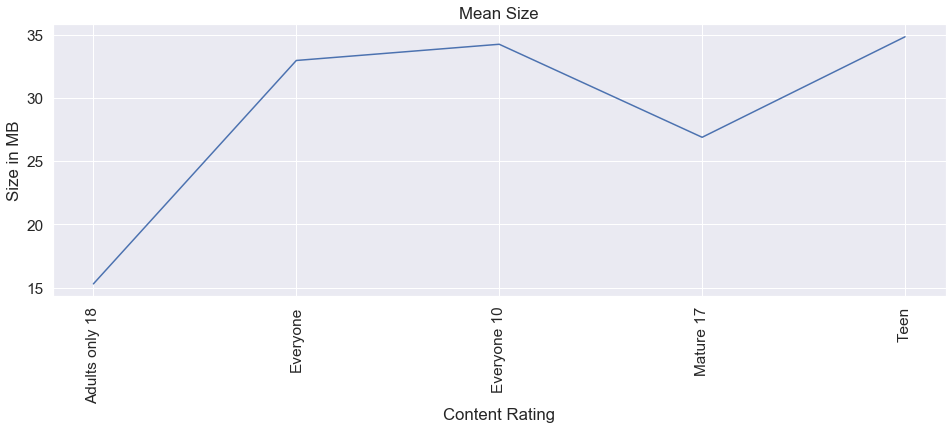

In [66]:
plt.figure(figsize=(16,5))
plt.plot(meanSize)
plt.xticks(rotation=90)
plt.title('Mean Size')
plt.xlabel('Content Rating')
plt.ylabel('Size in MB')
plt.show()

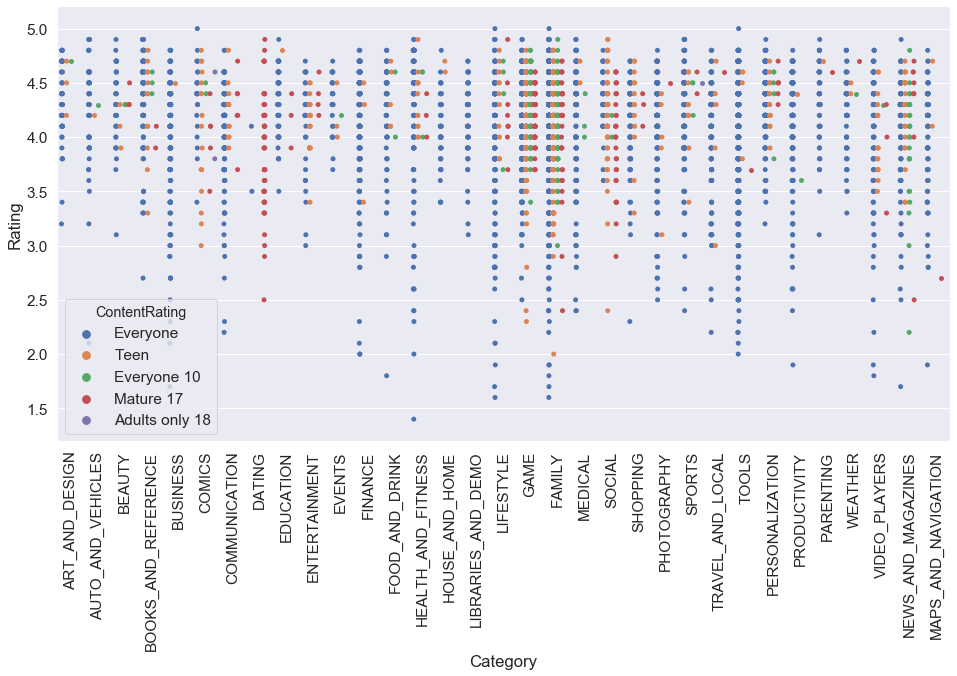

In [67]:
plt.figure(figsize=(16,8))
plt.xticks(rotation = 90)
sns.stripplot(x=data.Category,y=data.Rating, hue = data.ContentRating, dodge = True, jitter =True)


In [68]:
toipe = data.groupby('Type')
ratingsMean = toipe['Rating'].agg(np.mean)
reviewMean = toipe['Reviews'].agg(np.mean)
totalInstalls = toipe['Installs'].agg(np.sum)
meanInstalls = toipe['Installs'].agg(np.mean)
meanSize = toipe['Size'].agg(np.mean)
toipe.describe()

Rating                                              Reviews  \
       count      mean       std  min  25%  50%  75%  max   count   
Type                                                                
Free  5902.0  4.145374  0.465642  1.4  4.0  4.3  4.5  5.0  5902.0   
Paid   308.0  4.313312  0.402012  2.3  4.2  4.4  4.6  4.9   308.0   

                     ...   Installs                 Price             \
               mean  ...        75%           max   count       mean   
Type                 ...                                               
Free  148491.007794  ...  1000000.0  1.000000e+09  5902.0   0.000000   
Paid   12601.175325  ...   100000.0  1.000000e+07   308.0  16.398734   

                                               
           std   min   25%   50%   75%    max  
Type                                           
Free   0.00000  0.00  0.00  0.00  0.00    0.0  
Paid  68.65793  0.99  1.99  2.99  4.99  400.0  

[2 rows x 40 columns]

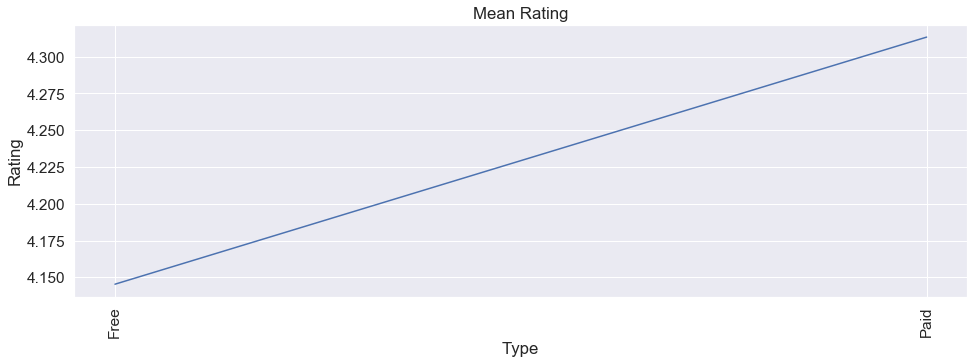

In [74]:
plt.figure(figsize=(16,5))
plt.plot(ratingsMean)
plt.xticks(rotation=90)
plt.title('Mean Rating')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()

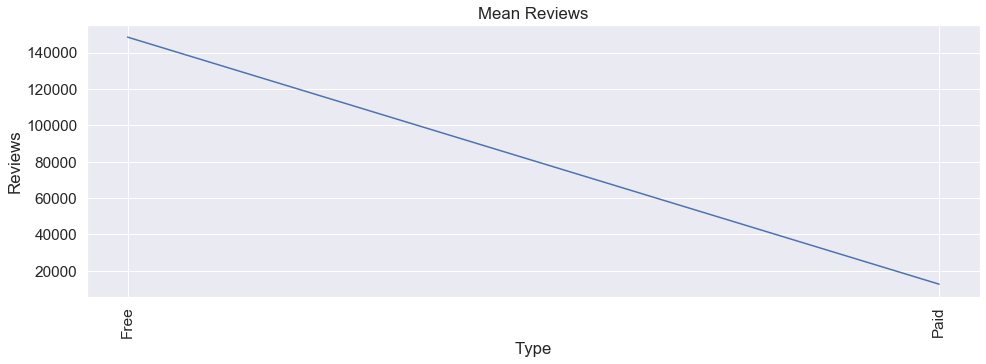

In [76]:
plt.figure(figsize=(16,5))
plt.plot(reviewMean)
plt.xticks(rotation=90)
plt.title('Mean Reviews')
plt.xlabel('Type')
plt.ylabel('Reviews')
plt.show()

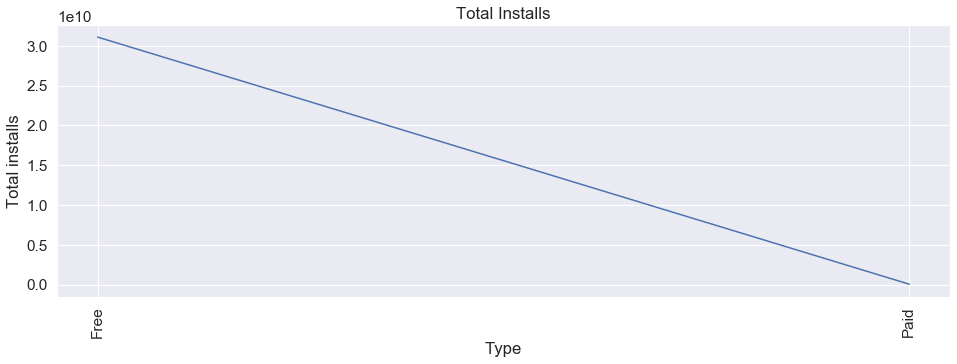

In [78]:
plt.figure(figsize=(16,5))
plt.plot(totalInstalls)
plt.xticks(rotation=90)
plt.title('Total Installs')
plt.xlabel('Type')
plt.ylabel('Total installs')
plt.show()

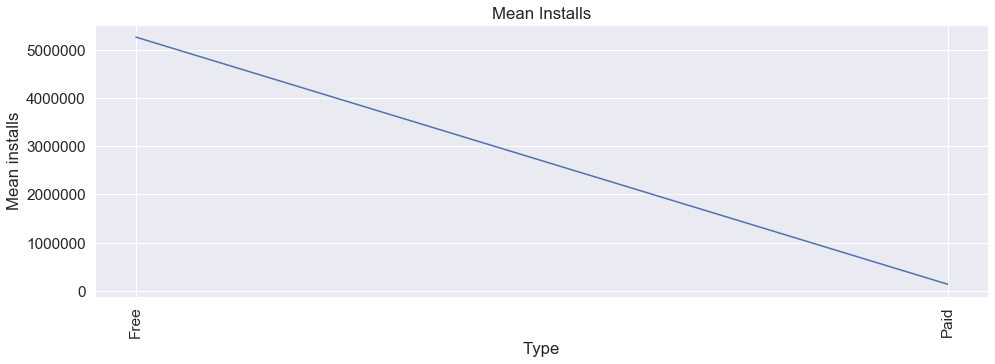

In [79]:
plt.figure(figsize=(16,5))
plt.plot(meanInstalls)
plt.xticks(rotation=90)
plt.title('Mean Installs')
plt.xlabel('Type')
plt.ylabel('Mean installs')
plt.show()

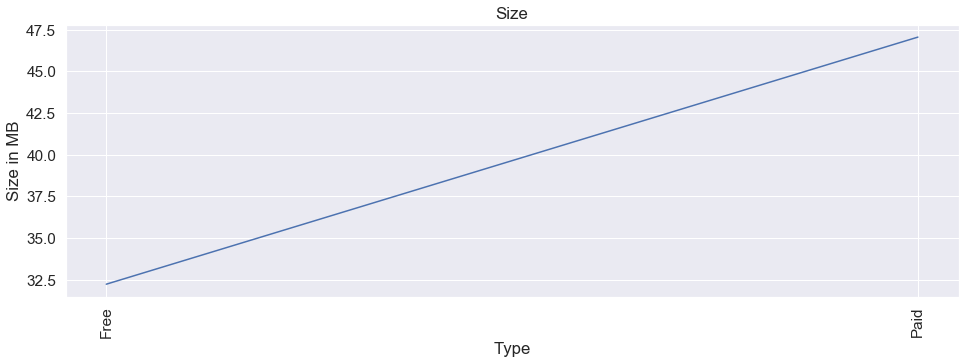

In [80]:
plt.figure(figsize=(16,5))
plt.plot(meanSize)
plt.xticks(rotation=90)
plt.title('Size')
plt.xlabel('Type')
plt.ylabel('Size in MB')
plt.show()

# STANDARDIZATION AND NORMALIZATION

In [81]:
data[['Reviews', 'Rating', 'Installs', 'Size', 'Price']]

,Reviews,Rating,Installs,Size,Price
0,159,4.1,10000.0,19.0,0.0
2,87510,4.7,5000000.0,8.7,0.0
3,215644,4.5,5000000.0,25.0,0.0
4,967,4.3,100000.0,2.8,0.0
5,167,4.4,50000.0,5.6,0.0
...,...,...,...,...,...
10830,881,3.8,100000.0,2.3,0.0
10831,38,4.3,5000.0,9.8,0.0
10832,1195,3.8,100000.0,582.0,0.0
10836,38,4.5,5000.0,53.0,0.0


In [82]:
#Standardization of Rating variable



# prepare data for standardization
ratings=data['Rating']
values = ratings.values
values = values.reshape((len(values), 1))
print("Before Standardization:")
print(values)

# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))


rating_normalized = scaler.transform(values)
print("After Standardization:")
print(rating_normalized)


rating_standardized=pd.DataFrame(rating_normalized)
rating_standardized

Before Standardization:
[[4.1]
 [4.7]
 [4.5]
 ...
 [3.8]
 [4.5]
 [4.5]]
Mean: 4.153704, StandardDeviation: 0.464061
After Standardization:
[[-0.11572552]
 [ 1.1772079 ]
 [ 0.74623009]
 ...
 [-0.76219224]
 [ 0.74623009]
 [ 0.74623009]]


,0
0,-0.115726
1,1.177208
2,0.746230
3,0.315252
4,0.530741
...,...
6205,-0.762192
6206,0.315252
6207,-0.762192
6208,0.746230


In [83]:
#Standardization of Reviews variable



# prepare data for standardization
reviews=data['Reviews']
values = reviews.values
values = values.reshape((len(values), 1))
print("Before Standardization:")
print(values)

# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))


reviews_normalized = scaler.transform(values)
print("After Standardization:")
print(reviews_normalized)
reviews_standardized=pd.DataFrame(reviews_normalized)
reviews_standardized

Before Standardization:
[[   159]
 [ 87510]
 [215644]
 ...
 [  1195]
 [    38]
 [398307]]
Mean: 141751.222222, StandardDeviation: 874696.827272
After Standardization:
[[-0.16187577]
 [-0.06201145]
 [ 0.08447816]
 ...
 [-0.16069136]
 [-0.1620141 ]
 [ 0.29330823]]


,0
0,-0.161876
1,-0.062011
2,0.084478
3,-0.160952
4,-0.161867
...,...
6205,-0.161050
6206,-0.162014
6207,-0.160691
6208,-0.162014


In [84]:
#Standardization of Installs variable



# prepare data for standardization
installs=data['Installs']
values = installs.values
values = values.reshape((len(values), 1))
print("Before Standardization:")
print(values)

# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))


installs_normalized = scaler.transform(values)
print("After Standardization:")
print(installs_normalized)
installs_standardized=pd.DataFrame(installs_normalized)
installs_standardized

Before Standardization:
[[1.e+04]
 [5.e+06]
 [5.e+06]
 ...
 [1.e+05]
 [5.e+03]
 [1.e+07]]
Mean: 5011537.037037, StandardDeviation: 25826644.321336
After Standardization:
[[-0.19365803]
 [-0.00044671]
 [-0.00044671]
 ...
 [-0.19017326]
 [-0.19385163]
 [ 0.1931518 ]]


,0
0,-0.193658
1,-0.000447
2,-0.000447
3,-0.190173
4,-0.192109
...,...
6205,-0.190173
6206,-0.193852
6207,-0.190173
6208,-0.193852


In [85]:
#Standardization of Size variable



# prepare data for standardization
size=data['Size']
values = size.values
values = values.reshape((len(values), 1))
print("Before Standardization:")
print(values)

# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))


size_normalized = scaler.transform(values)
print("After Standardization:")
print(size_normalized)
size_standardized=pd.DataFrame(size_normalized)
size_standardized

Before Standardization:
[[ 19. ]
 [  8.7]
 [ 25. ]
 ...
 [582. ]
 [ 53. ]
 [ 19. ]]
Mean: 32.974767, StandardDeviation: 90.964841
After Standardization:
[[-0.15362822]
 [-0.26685878]
 [-0.08766867]
 ...
 [ 6.03557621]
 [ 0.22014256]
 [-0.15362822]]


,0
0,-0.153628
1,-0.266859
2,-0.087669
3,-0.331719
4,-0.300938
...,...
6205,-0.337216
6206,-0.254766
6207,6.035576
6208,0.220143


In [86]:
#Standardization of Price variable



# prepare data for standardization
price=data['Price']
values = price.values
values = values.reshape((len(values), 1))
print("Before Standardization:")
print(values)

# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))


price_normalized = scaler.transform(values)
print("After Standardization:")
print(price_normalized)
price_standardized=pd.DataFrame(price_normalized)
price_standardized

Before Standardization:
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Mean: 0.813335, StandardDeviation: 15.675297
After Standardization:
[[-0.05188641]
 [-0.05188641]
 [-0.05188641]
 ...
 [-0.05188641]
 [-0.05188641]
 [-0.05188641]]


,0
0,-0.051886
1,-0.051886
2,-0.051886
3,-0.051886
4,-0.051886
...,...
6205,-0.051886
6206,-0.051886
6207,-0.051886
6208,-0.051886


In [87]:
data2 = data.copy(deep=True)

In [89]:
data2.Rating = rating_standardized[0]
data2.Reviews = reviews_standardized[0]
data2.Installs = installs_standardized[0]
data2.Size = size_standardized[0]
data2.Price=price_standardized[0]
data2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,-0.115726,-0.161876,-0.153628,-0.193658,Free,-0.051886,Everyone,Art & Design,07-Jan-18,4
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,0.746230,0.084478,-0.087669,-0.000447,Free,-0.051886,Everyone,Art & Design,01-Aug-18,4
3,Sketch - Draw & Paint,ART_AND_DESIGN,0.315252,-0.160952,-0.331719,-0.190173,Free,-0.051886,Teen,Art & Design,08-Jun-18,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,0.530741,-0.161867,-0.300938,-0.192109,Free,-0.051886,Everyone,Art & Design;Creativity,20-Jun-18,4
5,Paper flowers instructions,ART_AND_DESIGN,-0.762192,-0.161854,-0.153628,-0.192109,Free,-0.051886,Everyone,Art & Design,26-Mar-17,2


In [90]:
data2.describe()

,Rating,Reviews,Size,Installs,Price
count,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000
mean,0.005439,-0.013747,-0.011676,-0.017936,-0.025663
std,0.985516,0.836268,0.953526,0.925048,0.600995
min,-5.933926,-0.162058,-0.362500,-0.193852,-0.051886
25%,-0.331214,-0.161673,-0.322924,-0.192109,-0.051886
50%,0.315252,-0.157362,-0.230581,-0.190173,-0.051886
75%,0.746230,-0.115359,-0.010716,-0.155326,-0.051886
max,1.823675,28.306091,10.476853,38.525658,25.465334


C:\Users\nisha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\nisha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


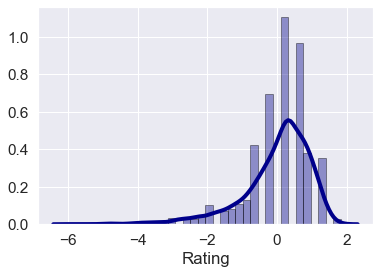

In [91]:
# Plot the PDF for Rating

sns.distplot(data2['Rating'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})



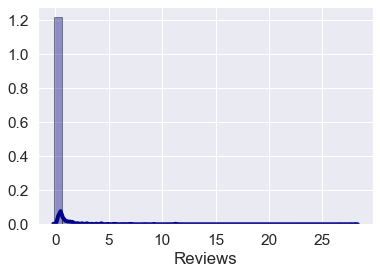

In [92]:
# Plot the PDF for Reviews

sns.distplot(data2['Reviews'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

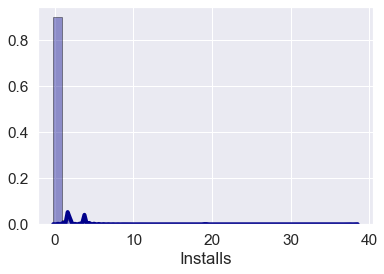

In [93]:
# Plot the PDF for Installs

sns.distplot(data2['Installs'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

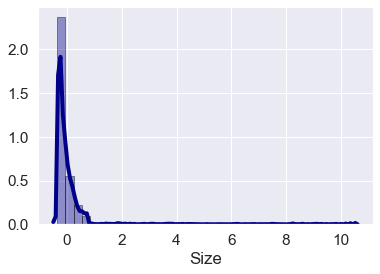

In [94]:
# Plot the PDF for Size
sns.distplot(data2['Size'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

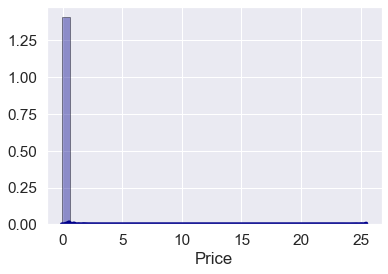

In [95]:
# Plot the PDF for Price
sns.distplot(data2['Price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

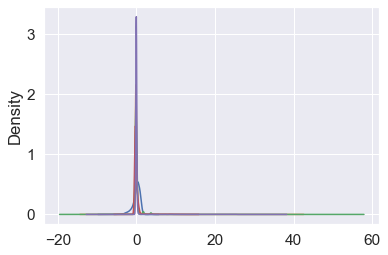

In [96]:
ax = data2.Rating.plot.kde()
bx = data2.Reviews.plot.kde()
cx = data2.Installs.plot.kde()
dx = data2.Size.plot.kde()
ex = data2.Price.plot.kde()

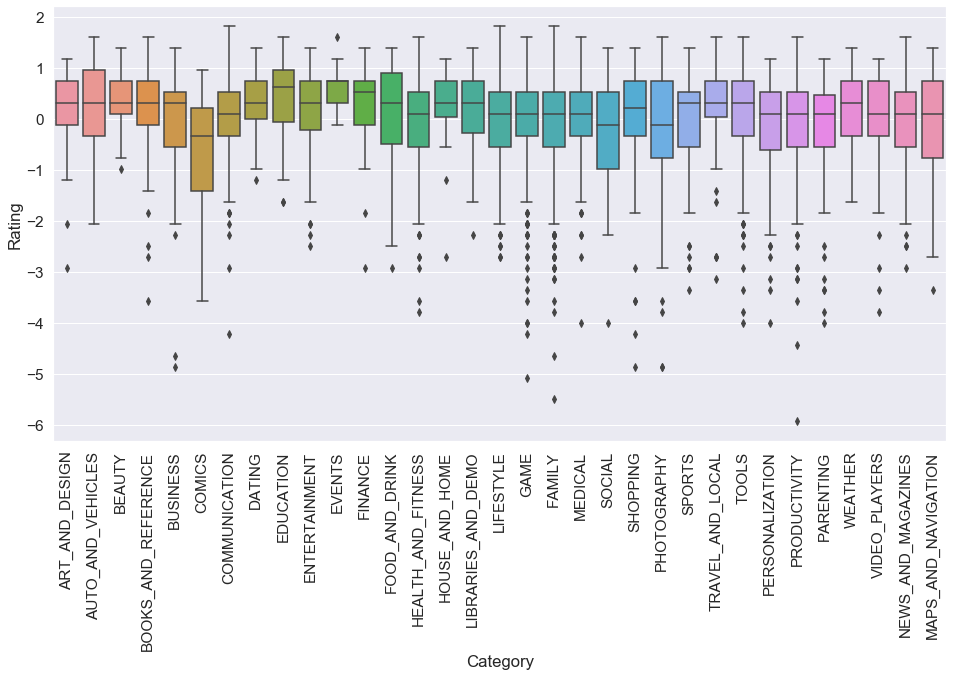

In [97]:
fig = plt.subplots(figsize = (16,8))
plt.xticks(rotation=90)
sns.boxplot(x=data2.Category, y=data2.Rating)

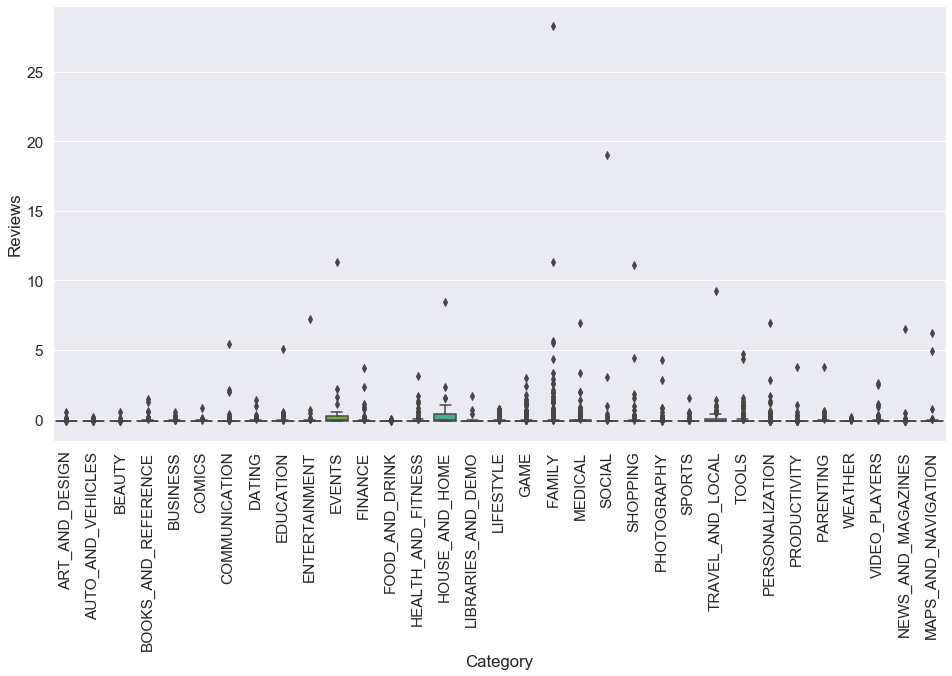

In [98]:
fig = plt.subplots(figsize = (16,8))
plt.xticks(rotation=90)
sns.boxplot(x=data2.Category, y=data2.Reviews)

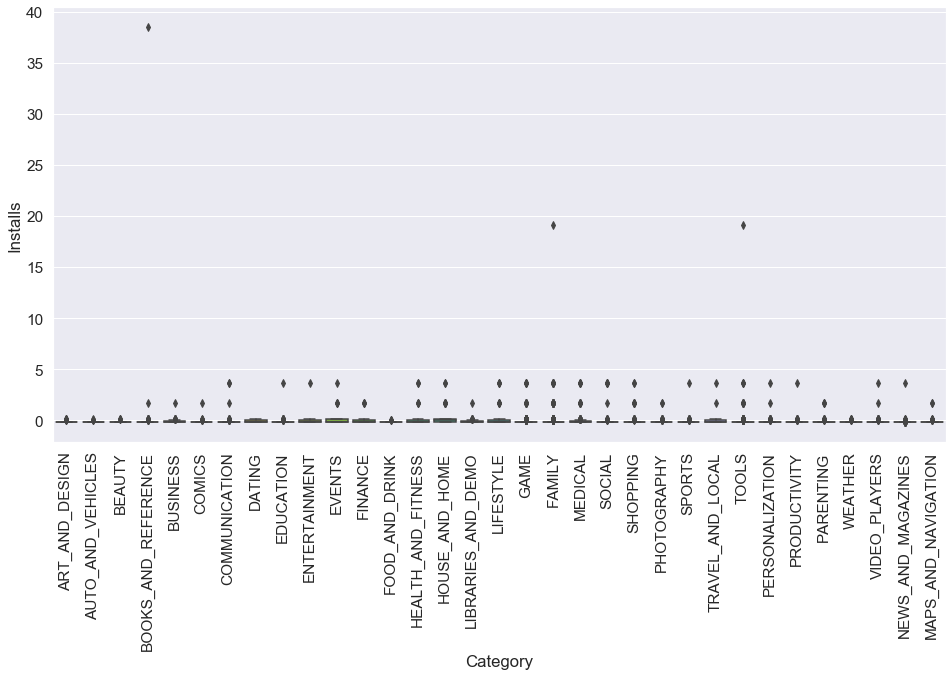

In [99]:
fig = plt.subplots(figsize = (16,8))
plt.xticks(rotation=90)
sns.boxplot(x=data2.Category, y=data2.Installs)

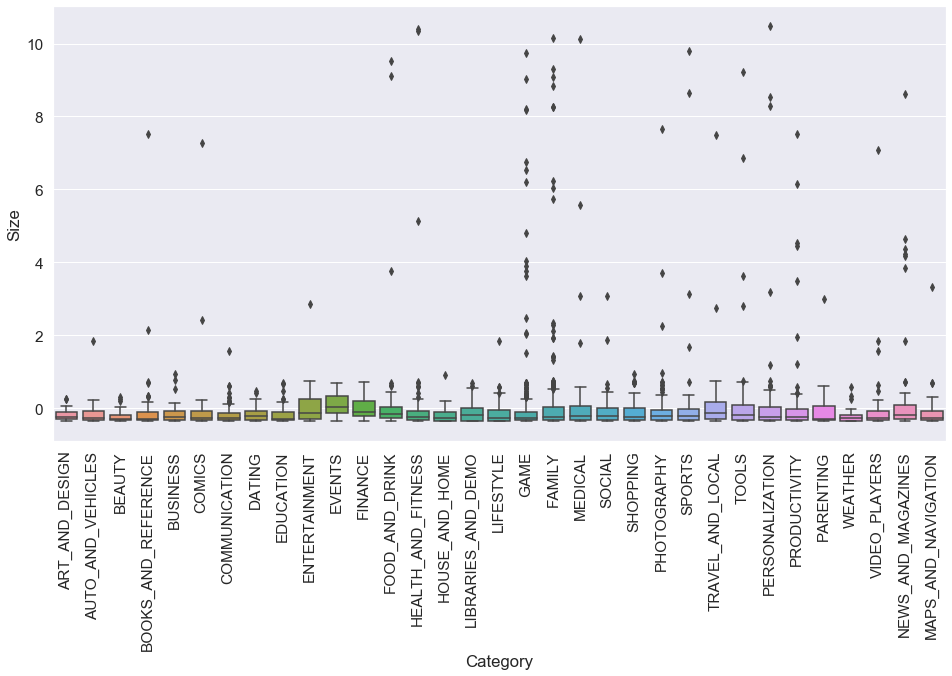

In [100]:
fig = plt.subplots(figsize = (16,8))
plt.xticks(rotation=90)
sns.boxplot(x=data2.Category, y=data2.Size)

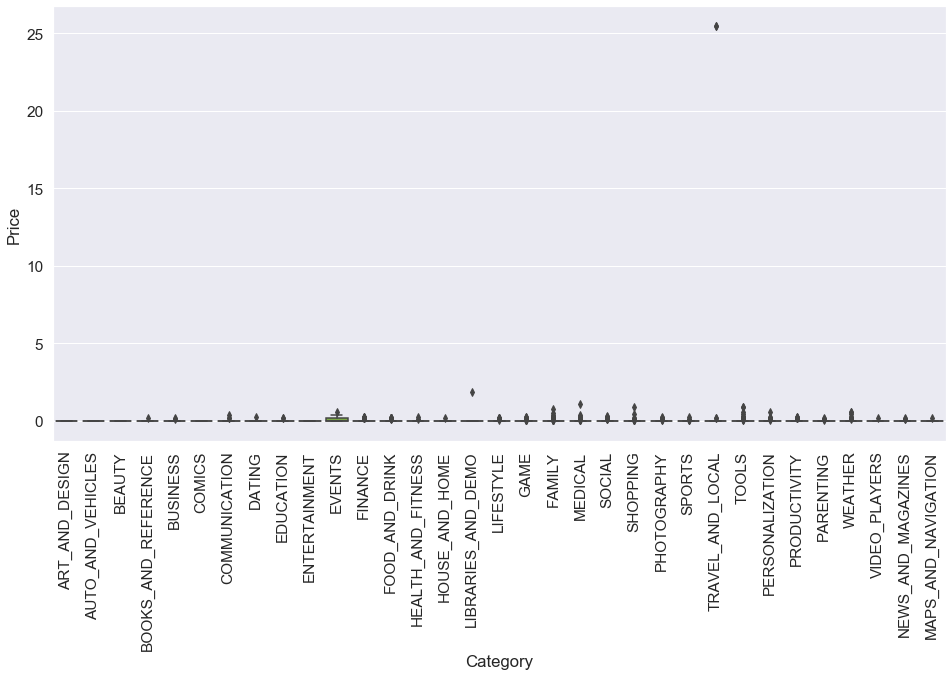

In [101]:
fig = plt.subplots(figsize = (16,8))
plt.xticks(rotation=90)
sns.boxplot(x=data2.Category, y=data2.Price)

# CORRELATION

In [102]:
data2.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.101953,-0.019354,0.052284,-0.001705
Reviews,0.101953,1.000000,-0.002856,0.527650,-0.007270
Size,-0.019354,-0.002856,1.000000,-0.017044,-0.002546
Installs,0.052284,0.527650,-0.017044,1.000000,-0.008141
Price,-0.001705,-0.007270,-0.002546,-0.008141,1.000000


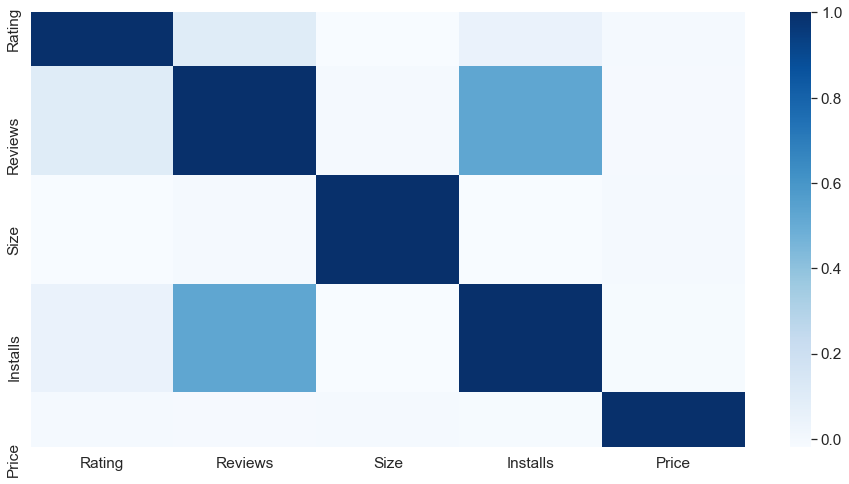

In [103]:
fig, ax = plt.subplots(figsize = (16,8))
sns.heatmap(data2.corr(),ax=ax,cmap="Blues")

In [104]:
cont.corr()

Rating   Reviews      Size  Installs     Price
ContentRating                                                            
Adults only 18 Rating    1.000000  0.721995  0.495382  0.397360       NaN
               Reviews   0.721995  1.000000  0.958698  0.921821       NaN
               Size      0.495382  0.958698  1.000000  0.993996       NaN
               Installs  0.397360  0.921821  0.993996  1.000000       NaN
               Price          NaN       NaN       NaN       NaN       NaN
Everyone       Rating    1.000000  0.086847 -0.036495  0.080607 -0.020230
               Reviews   0.086847  1.000000 -0.017546  0.688184 -0.007349
               Size     -0.036495 -0.017546  1.000000 -0.029585  0.034118
               Installs  0.080607  0.688184 -0.029585  1.000000 -0.012541
               Price    -0.020230 -0.007349  0.034118 -0.012541  1.000000
Everyone 10    Rating    1.000000  0.171562  0.081535  0.099826  0.084539
               Reviews   0.171562  1.000000  0.213799  0.754710 -0.066391
               Size      0.081535  0.213799  1.000000  0.117736 -0.110044
               Installs  0.099826  0.754710  0.117736  1.000000 -0.078179
               Price     0.084539 -0.066391 -0.110044 -0.078179  1.000000
Mature 17      Rating    1.000000  0.092867 -0.048296  0.051047  0.083570
               Reviews   0.092867  1.000000  0.014941  0.834431 -0.009348
               Size     -0.048296  0.014941  1.000000  0.075108  0.008568
               Installs  0.051047  0.834431  0.075108  1.000000 -0.031694
               Price     0.083570 -0.009348  0.008568 -0.031694  1.000000
Teen           Rating    1.000000  0.156731  0.066032 -0.015389  0.092030
               Reviews   0.156731  1.000000  0.050636  0.278786 -0.049597
               Size      0.066032  0.050636  1.000000 -0.028612 -0.017661
               Installs -0.015389  0.278786 -0.028612  1.000000 -0.027655
               Price     0.092030 -0.049597 -0.017661 -0.027655  1.000000

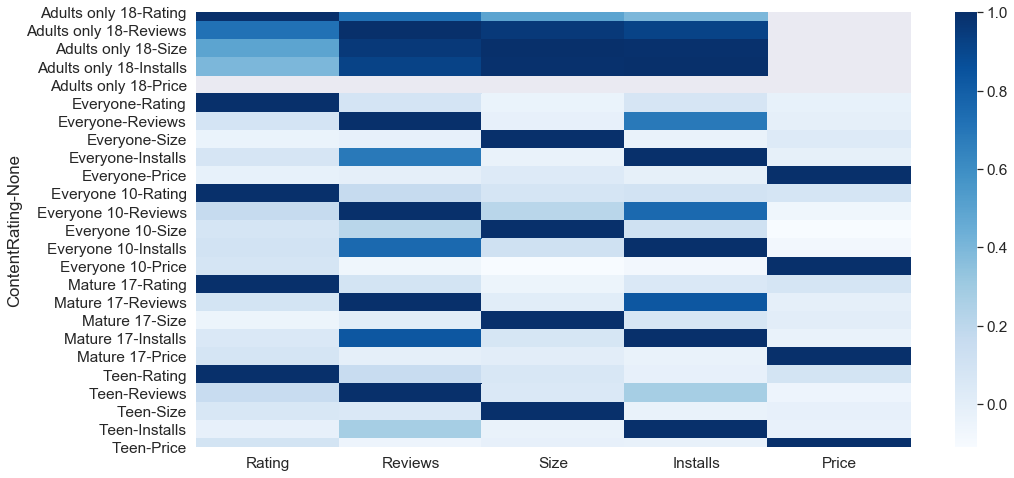

In [105]:
fig, ax = plt.subplots(figsize = (16,8))
sns.heatmap(cont.corr(),ax=ax,cmap="Blues")

In [106]:
datapaid = data[data.Type == 'Paid']
datapaid.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,Last Updated,Android Ver
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,0.0,100000.0,Paid,3.99,Everyone,Communication,05-Jul-18,4
854,Toca Life: Hospital,EDUCATION,4.7,3528,24.0,100000.0,Paid,3.99,Everyone,Education;Pretend Play,12-Jun-18,4
995,My Talking Pet,ENTERTAINMENT,4.6,6238,0.0,100000.0,Paid,4.99,Everyone,Entertainment,30-Jun-18,4
1001,Meme Generator,ENTERTAINMENT,4.6,3771,53.0,100000.0,Paid,2.99,Mature 17,Entertainment,03-Aug-18,4
1227,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.6,2129,0.0,10000.0,Paid,3.49,Everyone,Food & Drink,28-Jun-18,4


In [107]:
datapaid.describe()

,Rating,Reviews,Size,Installs,Price
count,308.000000,308.000000,308.000000,3.080000e+02,308.000000
mean,4.313312,12601.175325,47.048052,1.385227e+05,16.398734
std,0.402012,37993.949031,130.244993,6.105399e+05,68.657930
min,2.300000,18.000000,0.000000,5.000000e+03,0.990000
25%,4.200000,416.000000,2.875000,1.000000e+04,1.990000
50%,4.400000,1629.500000,15.500000,1.000000e+04,2.990000
75%,4.600000,8369.750000,40.000000,1.000000e+05,4.990000
max,4.900000,408292.000000,965.000000,1.000000e+07,400.000000


In [108]:
datapaid.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.153513,-0.142121,0.092899,-0.190294
Reviews,0.153513,1.000000,-0.016544,0.773163,-0.057931
Size,-0.142121,-0.016544,1.000000,0.015248,0.080371
Installs,0.092899,0.773163,0.015248,1.000000,-0.038847
Price,-0.190294,-0.057931,0.080371,-0.038847,1.000000


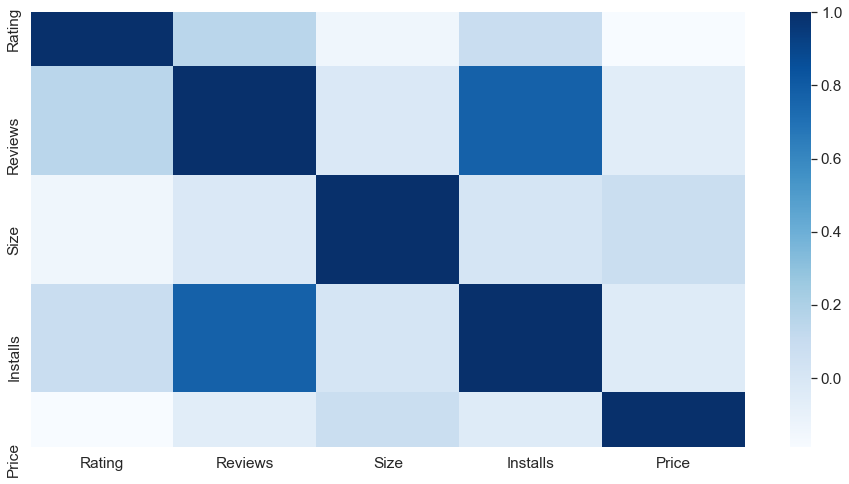

In [109]:
fig, ax = plt.subplots(figsize = (16,8))
sns.heatmap(datapaid.corr(),ax=ax,cmap="Blues")

In [110]:
datafree = data[data.Type == 'Free']
datafree.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,07-Jan-18,4
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,01-Aug-18,4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,5000000.0,Free,0.0,Teen,Art & Design,08-Jun-18,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,26-Mar-17,2


In [111]:
datafree.describe()

,Rating,Reviews,Size,Installs,Price
count,5902.000000,5.902000e+03,5902.000000,5.902000e+03,5902.0
mean,4.145374,1.484910e+05,32.240342,5.265839e+06,0.0
std,0.465642,8.967535e+05,88.399524,2.646922e+07,0.0
min,1.400000,0.000000e+00,0.000000,5.000000e+03,0.0
25%,4.000000,3.992500e+02,3.600000,5.000000e+04,0.0
50%,4.300000,5.064000e+03,11.000000,5.000000e+05,0.0
75%,4.500000,4.625025e+04,31.000000,1.000000e+06,0.0
max,5.000000,4.291653e+07,986.000000,1.000000e+09,0.0


In [112]:
datafree.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.100448,-0.024181,0.056542,NaN
Reviews,0.100448,1.000000,-0.009870,0.518576,NaN
Size,-0.024181,-0.009870,1.000000,-0.021571,NaN
Installs,0.056542,0.518576,-0.021571,1.000000,NaN
Price,NaN,NaN,NaN,NaN,NaN


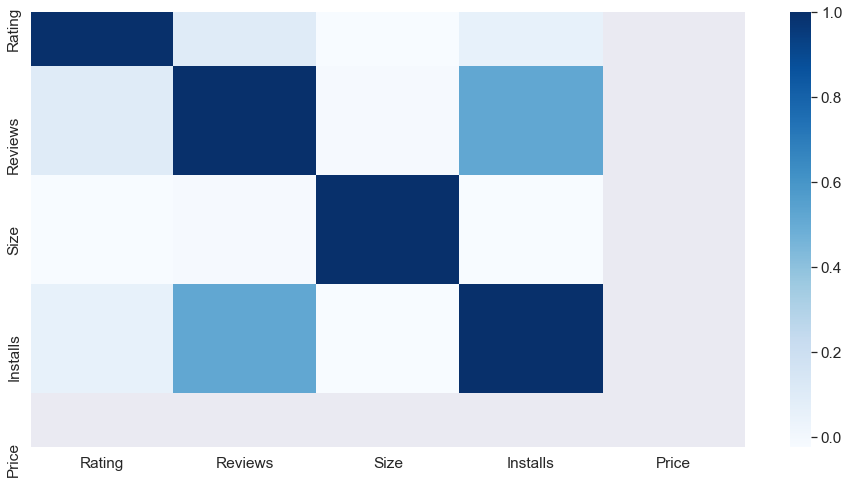

In [113]:
fig, ax = plt.subplots(figsize = (16,8))
sns.heatmap(datafree.corr(),ax=ax,cmap="Blues")

# HYPOTHESIS TESTING

In [159]:
def hypothesis(cat):
    population = data.loc[data['Category'] == cat]
    gru = 0.5
    while(1):
        sample = population.sample(frac = gru)
        if(len(sample)> 29):
            break;
        else :
            gru+=0.05
    sampleStdInstalls = sample["Installs"].std()
    sampleMeanInstalls = sample["Installs"].mean()
    sampleStdRating = sample["Rating"].std()
    sampleMeanRating = sample["Rating"].mean()
    alpha = 0.5
    NdistInstallsMean = 5000000
    NdistRatingMean = 4.20
    zScoreInstalls = (sampleMeanInstalls - NdistInstallsMean)/(sampleStdInstalls/(len(sample)**0.5))
    zScoreRating = (sampleMeanRating - NdistRatingMean)/(sampleStdRating/(len(sample)**0.5))
    pValueInstalls =  scipy.stats.norm.sf(zScoreInstalls)
    pValueRating =  scipy.stats.norm.sf(zScoreRating)
    
    print("Performing hypothesis test with the data belonging to the category : ",cat)
    print("Sample size = ",len(sample),"\n \n ")
    
    
    print("Hypothesis 1 :")
    print("Research Hypothesis Ha : The average rating of the apps belonging to the category : ",cat,"is > ",NdistRatingMean)
    print("Null Hypothesis Ho : The average rating of the apps belonging to the category : ",cat,"is <= ",NdistRatingMean)
    print("Sample mean : ",sampleMeanRating)
    print("Sample std : ",sampleStdRating)
    print("Z-Score : ",zScoreRating)
    print("P-Value : ",pValueRating)
    print("alpha : ",alpha)
    if(pValueRating < alpha):
        print("Null hypothesis Ho is REJECTED")
        a = 1
    else :
        a = 0
        print("BOTH Ho and Ha is PLAUSIBLE")
        print("In the case of this sample , there is {:.2f} % of probablity that the sample obtained is in disagreement with Ho".format((1-pValueRating)*100))
    print("\n\n")
    
    print("Hypothesis 2 :")
    print("Research Hypothesis Ha : The average Installs of the apps belonging to the category : ",cat,"is > ",NdistInstallsMean)
    print("Null Hypothesis Ho : The average Installs of the apps belonging to the category : ",cat,"is <= ",NdistInstallsMean)
    print("Sample mean : ",sampleMeanInstalls)
    print("Sample std : ",sampleStdInstalls)
    print("Z-Score : ",zScoreInstalls)
    print("P-Value : ",pValueInstalls)
    print("alpha : ",alpha)
    if(pValueInstalls < alpha):
        print("Null hypothesis Ho is REJECTED")
        b = 1
    else :
        b = 0
        print("BOTH Ho and Ha is PLAUSIBLE")
        print("In the case of this sample , there is {:.2f} % of probablity that the sample obtained is in disagreement with Ho".format((1-pValueInstalls)*100))
    print("\n\n")
    
    return (a,b)
    
    
    

In [160]:
catRat=[]
catInst=[]
catBoth=[]
for i in range(data.Category.nunique()) :
    a,b = hypothesis(data.Category.unique()[i])
    if(a==1):
        catRat.append(data.Category.unique()[i])
    if(b==1):
        catInst.append(data.Category.unique()[i])
    if(a==1 and b==1):
        catBoth.append(data.Category.unique()[i])
    

Performing hypothesis test with the data belonging to the category :  ART_AND_DESIGN
Sample size =  30 
 
 
Hypothesis 1 :
Research Hypothesis Ha : The average rating of the apps belonging to the category :  ART_AND_DESIGN is >  4.2
Null Hypothesis Ho : The average rating of the apps belonging to the category :  ART_AND_DESIGN is <=  4.2
Sample mean :  4.273333333333334
Sample std :  0.3859009461375873
Z-Score :  1.0408453590417452
P-Value :  0.14897366227929598
alpha :  0.5
Null hypothesis Ho is REJECTED



Hypothesis 2 :
Research Hypothesis Ha : The average Installs of the apps belonging to the category :  ART_AND_DESIGN is >  5000000
Null Hypothesis Ho : The average Installs of the apps belonging to the category :  ART_AND_DESIGN is <=  5000000
Sample mean :  1440500.0
Sample std :  2872922.742819044
Z-Score :  -6.786184725338571
P-Value :  0.9999999999942432
alpha :  0.5
BOTH Ho and Ha is PLAUSIBLE
In the case of this sample , there is 0.00 % of probablity that the sample obtained 

Sample mean :  978064.5161290322
Sample std :  1404400.6298176672
Z-Score :  -15.945014963148793
P-Value :  1.0
alpha :  0.5
BOTH Ho and Ha is PLAUSIBLE
In the case of this sample , there is 0.00 % of probablity that the sample obtained is in disagreement with Ho



Performing hypothesis test with the data belonging to the category :  LIBRARIES_AND_DEMO
Sample size =  34 
 
 
Hypothesis 1 :
Research Hypothesis Ha : The average rating of the apps belonging to the category :  LIBRARIES_AND_DEMO is >  4.2
Null Hypothesis Ho : The average rating of the apps belonging to the category :  LIBRARIES_AND_DEMO is <=  4.2
Sample mean :  4.182352941176471
Sample std :  0.2757585551685806
Z-Score :  -0.3731494423540157
P-Value :  0.645481388953024
alpha :  0.5
BOTH Ho and Ha is PLAUSIBLE
In the case of this sample , there is 35.45 % of probablity that the sample obtained is in disagreement with Ho



Hypothesis 2 :
Research Hypothesis Ha : The average Installs of the apps belonging to the category 

Performing hypothesis test with the data belonging to the category :  VIDEO_PLAYERS
Sample size =  64 
 
 
Hypothesis 1 :
Research Hypothesis Ha : The average rating of the apps belonging to the category :  VIDEO_PLAYERS is >  4.2
Null Hypothesis Ho : The average rating of the apps belonging to the category :  VIDEO_PLAYERS is <=  4.2
Sample mean :  4.021875
Sample std :  0.522043831401887
Z-Score :  -2.729655853174886
P-Value :  0.9968299763648261
alpha :  0.5
BOTH Ho and Ha is PLAUSIBLE
In the case of this sample , there is 0.32 % of probablity that the sample obtained is in disagreement with Ho



Hypothesis 2 :
Research Hypothesis Ha : The average Installs of the apps belonging to the category :  VIDEO_PLAYERS is >  5000000
Null Hypothesis Ho : The average Installs of the apps belonging to the category :  VIDEO_PLAYERS is <=  5000000
Sample mean :  23877500.0
Sample std :  125641727.85572246
Z-Score :  1.2019892003826949
P-Value :  0.11468385616149451
alpha :  0.5
Null hypothesis H

In [161]:
print("\n Categories which rejected the first NULL hypothesis : ",catRat,len(catRat))
print("\n Categories which rejected the second NULL hypothesis : ",catInst,len(catInst))
print("\n Categories which rejected both the hypotheses : ",catBoth,len(catBoth))
print("\n Number of categories : " ,data.Category.nunique())


 Categories which rejected the first NULL hypothesis :  ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'EDUCATION', 'EVENTS', 'GAME', 'SOCIAL', 'SPORTS', 'PERSONALIZATION', 'PARENTING', 'WEATHER'] 12

 Categories which rejected the second NULL hypothesis :  ['BOOKS_AND_REFERENCE', 'ENTERTAINMENT', 'HEALTH_AND_FITNESS', 'GAME', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'TOOLS', 'PRODUCTIVITY', 'VIDEO_PLAYERS'] 10

 Categories which rejected both the hypotheses :  ['BOOKS_AND_REFERENCE', 'GAME', 'SOCIAL'] 3

 Number of categories :  33
